In [47]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [32]:
df = pd.read_csv("./data/DEXINUS.csv",na_values='.')

In [35]:
df.columns = ['ds','y']

In [36]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df['y'] = pd.to_numeric(df['y'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [61]:
df['y'] = np.log(df['y'])

In [62]:
df.head()

,ds,y
0,2012-11-26,4.018723
1,2012-11-27,4.013677
2,2012-11-28,4.019980
3,2012-11-29,4.002047
4,2012-11-30,3.993787


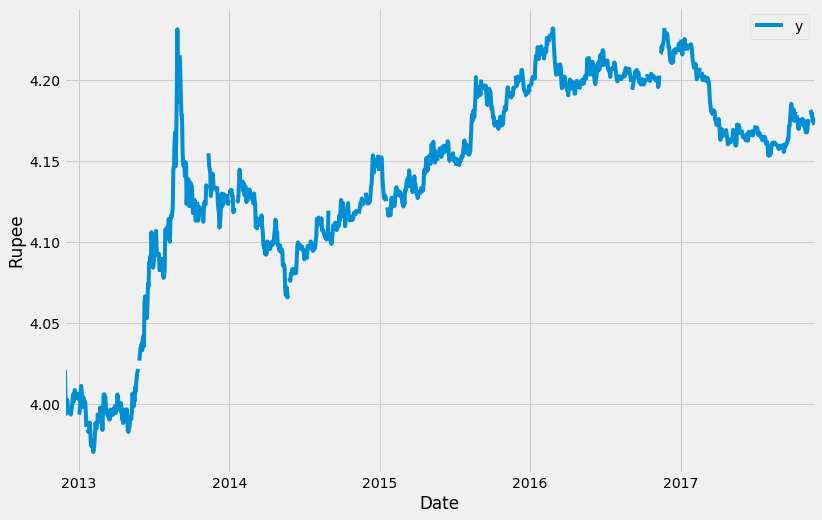

In [63]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Rupee')
ax.set_xlabel('Date')

plt.show()


In [64]:
prop = Prophet()

In [65]:
prop.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
future_data = prop.make_future_dataframe(periods=30, freq = 'd')

In [80]:
forecast_data = prop.predict(future_data)

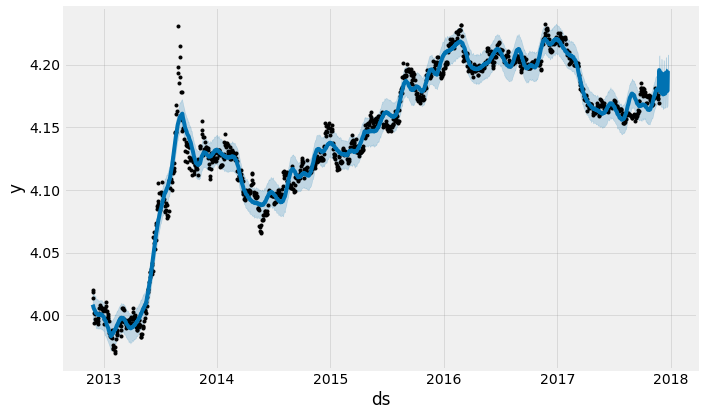

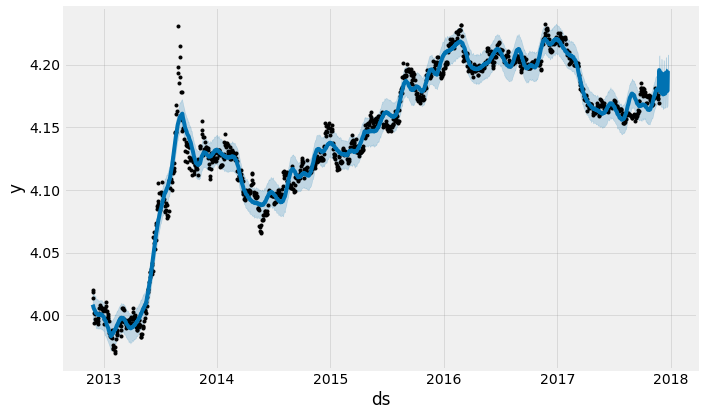

In [81]:
prop.plot(forecast_data)

In [82]:
forecast_data['y'] = np.exp(forecast_data['trend'])

In [85]:
forecast_data.tail(30)[['ds','y']]

,ds,y
1305,2017-11-25,64.433184
1306,2017-11-26,64.426174
1307,2017-11-27,64.419165
1308,2017-11-28,64.412156
1309,2017-11-29,64.405149
1310,2017-11-30,64.398142
1311,2017-12-01,64.391136
1312,2017-12-02,64.384130
1313,2017-12-03,64.377125
1314,2017-12-04,64.370122
